In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
def load_object_from_pkl(filename):
    """
    Load an object from a .pkl file using pickle.
    
    Parameters:
        filename (str): The name of the .pkl file.
    
    Returns:
        object: The loaded object from the .pkl file.
    """
    with open(filename, 'rb') as f:
        obj = pickle.load(f)
    print(f"Object loaded from {filename}")
    return obj

In [3]:
data_a_1 = load_object_from_pkl("vstirap_length_rate/finer_sampling/data_lensweep_omegaL:25.0.pkl")
data_a_3 = load_object_from_pkl("vstirap_length_rate/finer_sampling/data_lensweep_omegaL:50.0.pkl")
data_a_5 = load_object_from_pkl("vstirap_length_rate/finer_sampling/data_lensweep_omegaL:75.0.pkl")

data_full = [data_a_1, data_a_3, data_a_5]

data_mc_1 = load_object_from_pkl("vstirap_length_rate/mc/data_lensweep_omegaL:25.0.pkl")
data_mc_3 = load_object_from_pkl("vstirap_length_rate/mc/data_lensweep_omegaL:50.0.pkl")
data_mc_5 = load_object_from_pkl("vstirap_length_rate/mc/data_lensweep_omegaL:75.0.pkl")

Object loaded from vstirap_length_rate/finer_sampling/data_lensweep_omegaL:25.0.pkl
Object loaded from vstirap_length_rate/finer_sampling/data_lensweep_omegaL:50.0.pkl
Object loaded from vstirap_length_rate/finer_sampling/data_lensweep_omegaL:75.0.pkl
Object loaded from vstirap_length_rate/mc/data_lensweep_omegaL:25.0.pkl
Object loaded from vstirap_length_rate/mc/data_lensweep_omegaL:50.0.pkl
Object loaded from vstirap_length_rate/mc/data_lensweep_omegaL:75.0.pkl


In [4]:
len_list=[0.0333,0.0666,0.1,0.133,0.166,0.2,0.233,0.266,0.3,0.333,0.366,0.4,0.433,0.466,0.5,0.533,0.566,0.6,0.633,0.666,0.7,0.733,0.766,0.8,0.833,0.866,0.9,0.933,0.966,1]


full_analysis_data=[]

for data_a_0 in data_full:
    phase_list_e=[]
    phase_list_l=[]
    n_ph_e=[]
    n_ph_l=[]
    n_ph_t=[]
    n_err_e=[]
    n_err_l=[]
    n_err_t=[]
    scattering_e=[]
    scattering_l=[]
    scattering_total_e=[]
    scattering_total_l=[]

    for i in range(len(len_list)):
        n_ph_e.append(data_a_0[int(2*i)][5])
        n_ph_l.append(data_a_0[int(2*i+1)][5])
        n_ph_t.append(data_a_0[int(2*i)][5]+data_a_0[int(2*i+1)][5])
        n_err_e.append(data_a_0[int(2*i)][4])
        n_err_l.append(data_a_0[int(2*i+1)][4])
        n_err_t.append(data_a_0[int(2*i)][4]+data_a_0[int(2*i+1)][4])
        scattering_e.append(data_a_0[int(2*i)][3])
        scattering_l.append(data_a_0[int(2*i+1)][3])
        scattering_total_e.append(data_a_0[int(2*i)][7])
        scattering_total_l.append(data_a_0[int(2*i+1)][7])
    
    full_analysis_data.append([n_ph_e,n_ph_l,n_ph_t,phase_list_e,phase_list_l,scattering_e,scattering_l, n_err_e, n_err_l, n_err_t, scattering_total_e, scattering_total_l])


In [5]:
len_list_MC=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
err_MC=0.02
full_data_MC=[]

for data_a_0 in [data_mc_1, data_mc_3, data_mc_5]:
    scattering_t_l=[]
    scattering_t_e=[]
    scattering_t=[]
    emissions_x_e=[]
    emissions_x_l=[]
    emissions_y_e=[]
    emissions_y_l=[]
    emissions_x_t=[]
    emissions_y_t=[]
    emissions_false_e=[]
    emissions_false_l=[]
    emissions_false_t=[]

    for i in range(len(len_list_MC)):
        scattering_t_e.append(data_a_0[int(2*i)][3])
        scattering_t_l.append(data_a_0[int(2*i+1)][3])
        scattering_t.append(data_a_0[int(2*i)][3]+data_a_0[int(2*i+1)][3])
        emissions_x_e.append(data_a_0[int(2*i)][5])
        emissions_x_l.append(data_a_0[int(2*i+1)][5])
        emissions_x_t.append(data_a_0[int(2*i)][5]+data_a_0[int(2*i+1)][5])
        emissions_y_e.append(data_a_0[int(2*i)][6])
        emissions_y_l.append(data_a_0[int(2*i+1)][6])
        emissions_y_t.append(data_a_0[int(2*i)][6]+data_a_0[int(2*i+1)][6])
        emissions_false_e.append(data_a_0[int(2*i)][4])
        emissions_false_l.append(data_a_0[int(2*i+1)][4])
        emissions_false_t.append(data_a_0[int(2*i)][4]+data_a_0[int(2*i+1)][4])
    
    full_data_MC.append([emissions_x_t,emissions_y_t,emissions_false_t,scattering_t])



IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

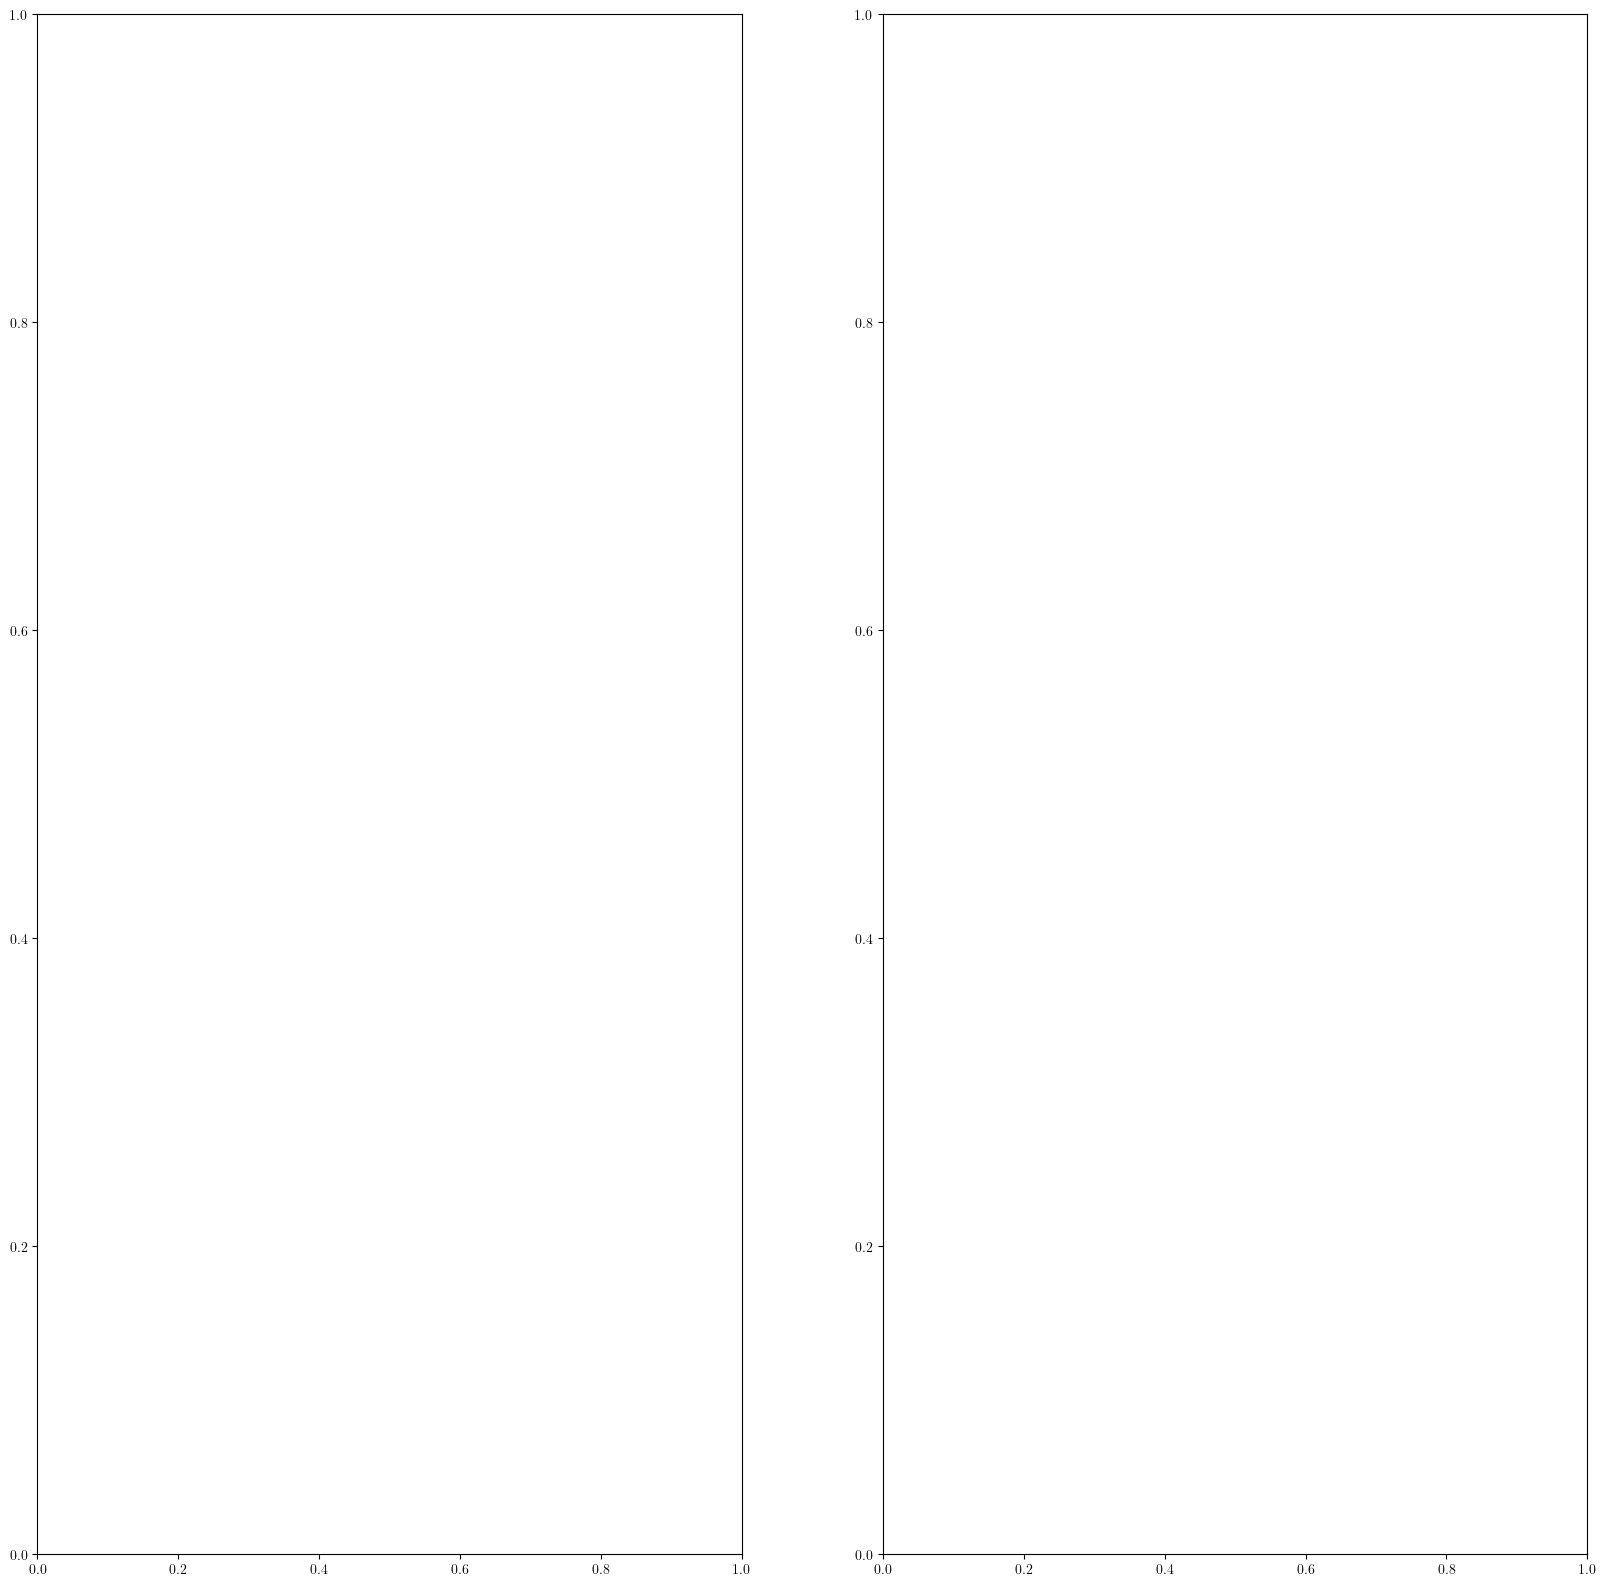

In [6]:
area_indexes=[0,1,2]
pulse_areas=[25,50,75]

# Create figure and axes
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(1, 2, figsize=(20, 20))

# Plot data

for i in range(3):

    useful_emissions=np.array(full_data_MC[area_indexes[i]][1])-np.array(full_data_MC[area_indexes[i]][2])
    useful_errors=useful_emissions*err_MC

    axs[i, 0].plot(len_list, full_analysis_data[area_indexes[i]][2], color='g', label='Desired $\pi$ Photon')
    axs[i, 0].errorbar(len_list_MC, useful_emissions, yerr=useful_errors, color='b', fmt='o', label='Fully Coherent $\pi$ Photon (from MC)')
    #axs[i, 0].plot(len_list_MC, full_data_MC[area_indexes[i]][1], color='g', label='MC Pi Photon')
    #axs[i, 0].plot(len_list_MC, full_data_MC[area_indexes[i]][0], color='c', label='MC H/V Photon')
    axs[i, 0].plot(len_list, full_analysis_data[area_indexes[i]][9], color='r', label='Error Photon H/V')
    axs[i, 0].legend()
    axs[i, 0].set_title(f'Length vs Expected Photon Generation at $\Omega L$={pulse_areas[i]}')
    axs[i, 0].set_xlabel('Pulse Length / microseconds')
    axs[i, 0].set_ylabel('Photon Generation Efficiency (Early + Late)')

    false_emission_errors=np.array(full_data_MC[area_indexes[i]][2])*err_MC

    axs[i, 1].plot(len_list, np.array(full_analysis_data[area_indexes[i]][5])+np.array(full_analysis_data[area_indexes[i]][6]), color='b' , label="Spontaneous Emission -> initial state")
    axs[i, 1].plot(len_list, np.array(full_analysis_data[area_indexes[i]][10])+np.array(full_analysis_data[area_indexes[i]][11]), color='g', label="Total Spontaneous Emission")
    axs[i, 1].errorbar(len_list_MC, full_data_MC[area_indexes[i]][2], yerr=false_emission_errors,color='r',fmt='o', label='$\pi$ Photon following scattering (from MC)')

    axs[i, 1].legend()
    axs[i, 1].set_title('Scattering Rates vs Pulse Length')
    axs[i, 1].set_xlabel('Pulse Length / $\mu s$')
    axs[i, 1].set_ylabel('Total Scattering (Early + Late)')


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

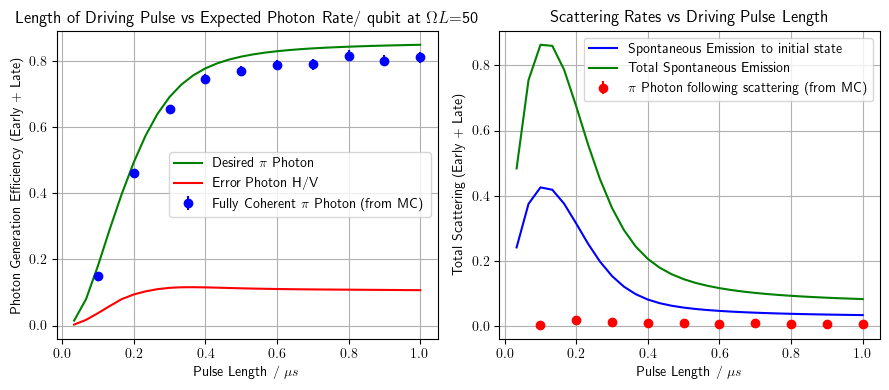

In [7]:
area_indexes=[1]
pulse_areas=[50]

# Create figure and axes
plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(1, 2, figsize=(9, 4))

# Plot data

for i in range(1):

    useful_emissions=np.array(full_data_MC[area_indexes[i]][1])-np.array(full_data_MC[area_indexes[i]][2])
    useful_errors=useful_emissions*err_MC

    axs[0].plot(len_list, full_analysis_data[area_indexes[i]][2], color='g', label='Desired $\pi$ Photon')
    axs[0].errorbar(len_list_MC, useful_emissions, yerr=useful_errors, color='b', fmt='o', label='Fully Coherent $\pi$ Photon (from MC)')
    #axs[i, 0].plot(len_list_MC, full_data_MC[area_indexes[i]][1], color='g', label='MC Pi Photon')
    #axs[i, 0].plot(len_list_MC, full_data_MC[area_indexes[i]][0], color='c', label='MC H/V Photon')
    axs[0].plot(len_list, full_analysis_data[area_indexes[i]][9], color='r', label='Error Photon H/V')
    axs[0].legend()
    axs[0].set_title(f'Length of Driving Pulse vs Expected Photon Rate/ qubit at $\Omega L$={pulse_areas[i]}')
    axs[0].set_xlabel('Pulse Length / $\mu s$')
    axs[0].set_ylabel('Photon Generation Efficiency (Early + Late)')
    axs[0].grid(True)

    false_emission_errors=np.array(full_data_MC[area_indexes[i]][2])*err_MC

    axs[1].plot(len_list, np.array(full_analysis_data[area_indexes[i]][5])+np.array(full_analysis_data[area_indexes[i]][6]), color='b' , label="Spontaneous Emission to initial state")
    axs[1].plot(len_list, np.array(full_analysis_data[area_indexes[i]][10])+np.array(full_analysis_data[area_indexes[i]][11]), color='g', label="Total Spontaneous Emission")
    axs[1].errorbar(len_list_MC, full_data_MC[area_indexes[i]][2], yerr=false_emission_errors,color='r',fmt='o', label='$\pi$ Photon following scattering (from MC)')

    axs[1].legend()
    axs[1].set_title('Scattering Rates vs Driving Pulse Length')
    axs[1].set_xlabel('Pulse Length / $\mu s$')
    axs[1].set_ylabel('Total Scattering (Early + Late)')
    axs[1].grid(True)


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

fig.savefig('pdf_figs/length_vs_photon_generation_MC.pdf')

/var/folders/84/6zy47zys0zq24f6tn3h7g1b4000t3k/T/ipykernel_30352/2681844233.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


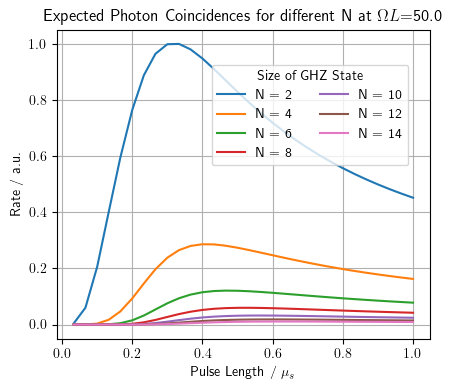

In [ ]:
#pickout one fixed pulse area and consider rate optimisation

def rate_function(l,n):
    ind = np.where(l_list == l)[0][0]
    eta=full_analysis_data[1][2][ind]
    return eta**n/(4*l*n)

# Define values for l and n
l_list = np.array(len_list[0:30])
n_list = np.arange(2, 16, 2)

max_r=max([rate_function(l, 2) for l in l_list])

# Plot the rate function for each value of N
fig, axs = plt.subplots(1, 1, figsize=(4.5, 4))
for n in n_list:
    R = np.array([rate_function(l, n) for l in l_list])/max_r
    axs.plot(l_list, R, label=f'N = {n}')

# Set labels and title
axs.set_xlabel('Pulse Length / $\mu_s$')
axs.set_ylabel('Rate / a.u.')
axs.set_title('Expected Photon Coincidences for different N at $\Omega L$=50.0')
fig.legend(title='Size of GHZ State', bbox_to_anchor=(0.7, 0.7), loc='center', ncol=2)

# Show plot
axs.grid(True)
fig.show()
fig.tight_layout()

fig.savefig('pdf_figs/rate_optimisation.pdf')




